In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
import pandas as pd

# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Relevant?', 
    'Year', 
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data

# look for relevant ones
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] == 1]

approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    approximation_algorithms[col] = pd.to_numeric(approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0], errors='coerce').fillna(99999)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)

# Sort the DataFrame for correct group-wise comparison
approximation_algorithms.sort_values(by=['Family Name', 'Variation', 'Year'], inplace=True)

approximation_algorithms['Improvement'] = 0
# Identify improvements
def identify_improvements(group):
    # Ensure necessary columns are present
    necessary_columns = ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']
    if not all(col in group.columns for col in necessary_columns):
        raise ValueError("Missing one or more necessary columns")

    # Initialize 'Improvement' column and 'Best_' columns safely
    group['Improvement'] = 0
    for col in necessary_columns:
        group['Best_' + col] = 999999

    # Initialize best values for the first row
    for col in necessary_columns:
        group['Best_' + col].iat[0] = group[col].iat[0]
        group['Improvement'].iat[0] = 0

    # Compute best values and track improvements
    for i in range(1, len(group)):
        for col in necessary_columns:
            previous_best = group['Best_' + col].iat[i - 1]
            current_value = group[col].iat[i]

            if current_value < previous_best:
                group['Best_' + col].iat[i] = current_value
                group['Improvement'].iat[i] = 1
            else:
                group['Best_' + col].iat[i] = previous_best

    # Drop helper columns
    drop_cols = ['Best_' + col for col in necessary_columns]
    group.drop(columns=drop_cols, inplace=True)

    return group


approximation_algorithms = approximation_algorithms.groupby(['Family Name', 'Variation']).apply(identify_improvements)

approximation_algorithms['Improvement'] = approximation_algorithms['Improvement'].astype(int)

approximation_algorithms


/var/folders/lx/jxx7wnmn4q5g51lkvkx6hndc0000gn/T/ipykernel_6980/4024507345.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  group['Best_' + col].iat[0] = group[col].iat[0]
/var/folders/lx/jxx7wnmn4q5g51lkvkx6hndc0000gn/T/ipykernel_6980/4024507345.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.04' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  group['Best_' + col].iat[0] = group[col].iat[0]
/var/folders/lx/jxx7wnmn4q5g51lkvkx6hndc0000gn/T/ipykernel_6980/4024507345.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.01' has dtype incompatible with int64, please explicitly cast to a compatible dt

Family Name  \
Family Name                     Variation                                                                                 
All-Pairs Shortest Paths (APSP) APSP, unweighted, undirected, no FMM (Approximate) 148  All-Pairs Shortest Paths (APSP)   
                                                                                   149  All-Pairs Shortest Paths (APSP)   
                                                                                   150  All-Pairs Shortest Paths (APSP)   
                                                                                   151  All-Pairs Shortest Paths (APSP)   
                                                                                   152  All-Pairs Shortest Paths (APSP)   
...                                                                                                                 ...   
kth Order Statistic             Approximate kth Order Statistic                    7                kth Order Statistic   
                                                                                   8                kth Order Statistic   
                                                                                   9                kth Order Statistic   
                                                                                   10               kth Order Statistic   
n-Queens Problem                n-Queens Completion                                864                 n-Queens Problem   

                                                                                        Relevant?  \
Family Name                     Variation                                                           
All-Pairs Shortest Paths (APSP) APSP, unweighted, undirected, no FMM (Approximate) 148        1.0   
                                                                                   149        1.0   
                                                                                   150        1.0   
                                                                                   151        1.0   
                                                                                   152        1.0   
...                                                                                           ...   
kth Order Statistic             Approximate kth Order Statistic                    7          1.0   
                                                                                   8          1.0   
                                                                                   9          1.0   
                                                                                   10         1.0   
n-Queens Problem                n-Queens Completion                                864        1.0   

                                                                                                                                Variation  \
Family Name                     Variation                                                                                                   
All-Pairs Shortest Paths (APSP) APSP, unweighted, undirected, no FMM (Approximate) 148  APSP, unweighted, undirected, no FMM (Approxim...   
                                                                                   149  APSP, unweighted, undirected, no FMM (Approxim...   
                                                                                   150  APSP, unweighted, undirected, no FMM (Approxim...   
                                                                                   151  APSP, unweighted, undirected, no FMM (Approxim...   
                                                                                   152  APSP, unweighted, undirected, no FMM (Approxim...   
...                                                                                                                                   ...   
kth Order Statistic             Approximate kth Order Statistic   

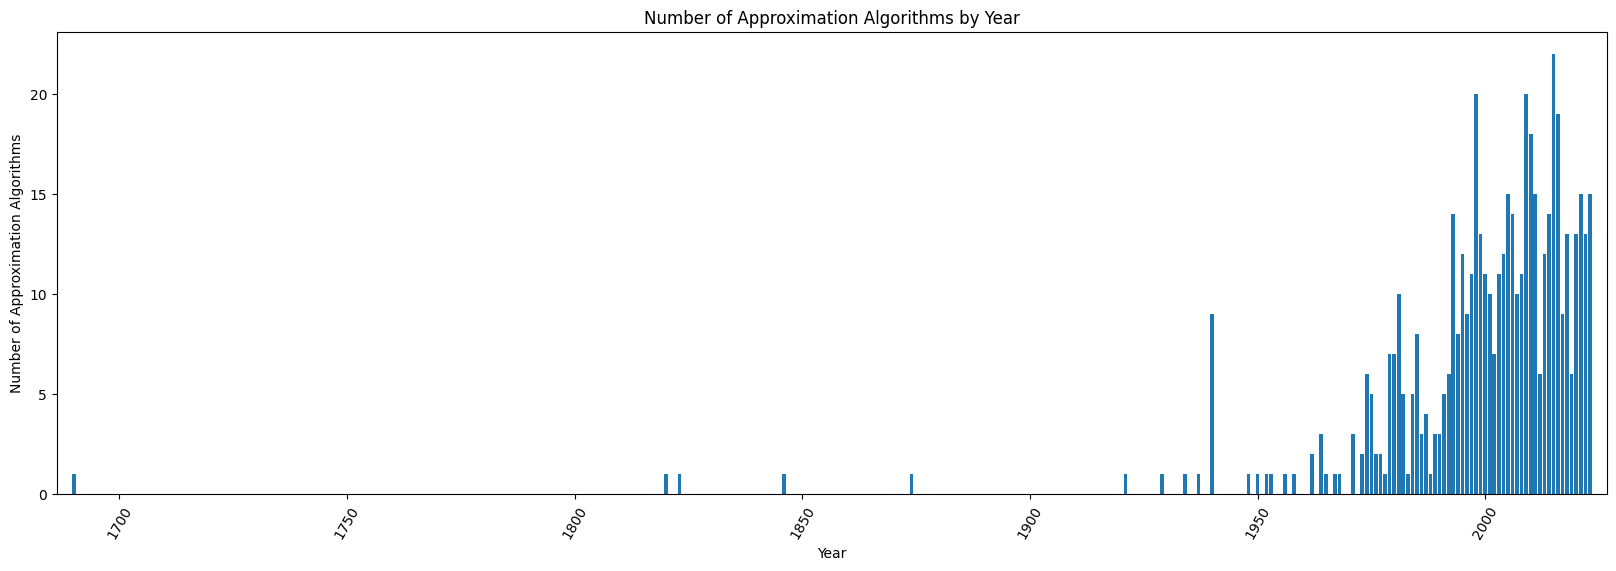

In [4]:
# Plot number of approximated algorithms by year
data = approximation_algorithms

data = data.groupby(['Year']).size()

fig, ax = plt.subplots()
bar_container = ax.bar(data.index, data.values)
# set figure size
fig.set_size_inches(20, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year')
plt.show()

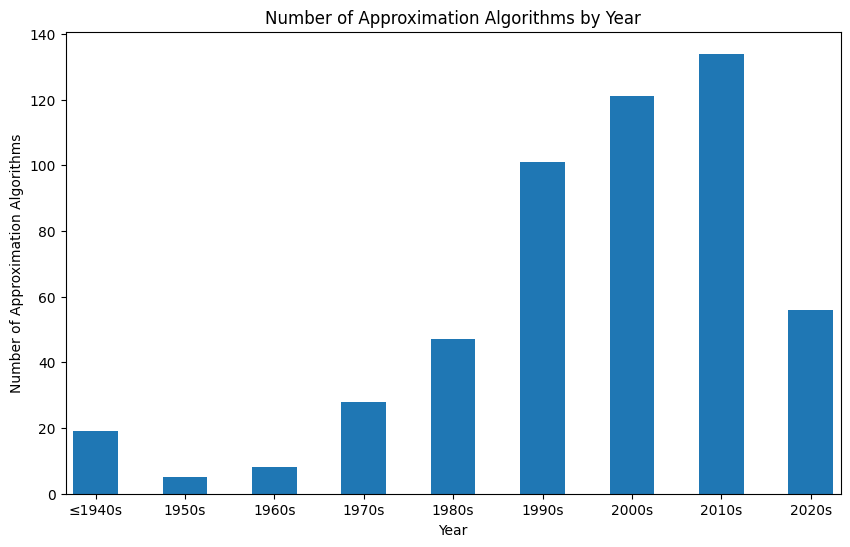

In [13]:
# Plot number of approximation algorithms by decade
data = approximation_algorithms

data = data.groupby(data['Year'] // 10 * 10).size()

# merge all year <= 1940 into 1940
data[1940] = data.loc[:1940].sum()
data = data.drop(data.loc[:1939].index)







fig, ax = plt.subplots()

bar_container = ax.bar(data.index, data.values, width=5)

# set figure size
fig.set_size_inches(10, 6)

plt.margins(x=0.01)



ax.set_xticks(data.index)
ax.set_xticklabels(['≤1940s'] + [str(year) + 's' for year in data.index[1:]])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year')
plt.show()

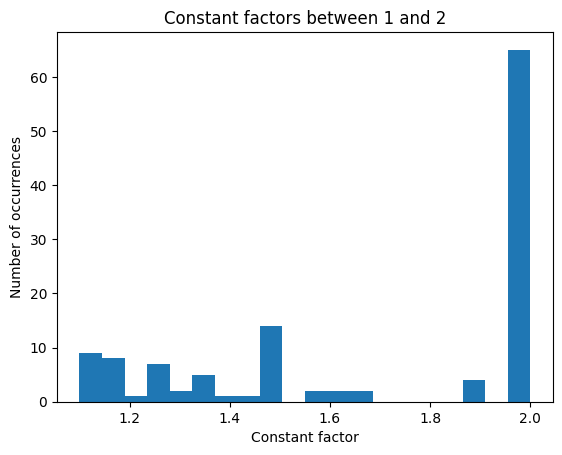

In [12]:
data = approximation_algorithms

data = data.loc[:,'Approximation Factor Class (Mult)']

const_factors = []

for factor in data:
    if factor > 2 and factor <= 3:
        const_factors.append(factor-1)

plt.hist(const_factors, bins=20)

plt.title('Constant factors between 1 and 2')
plt.xlabel('Constant factor')
plt.ylabel('Number of occurrences')

plt.show()